Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def exercise_0(file):
    df = pd.read_csv(file)
    return df

def exercise_1(df):
    return list(df.columns)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    sample_list = []
    num_rows = df.shape[0]
    for i in range(k):
        random_index = random.randint(0, num_rows)
        sample_list.append(df.iloc[random_index])

    return sample_list

def exercise_4(df):
    return df.drop_duplicates(subset=['type'], keep='first')

def exercise_5(df):
    return df['amount'].value_counts().nlargest(10)

def exercise_6(df):
    return df[df['isFlaggedFraud'] == 1]

def exercise_7(df):
    pass

def visual_1(df):
    pass

def visual_2(df):
    pass

def exercise_custom(df):
    pass
    
def visual_custom(df):
    pass

In [2]:
df = exercise_0('transactions.csv')
col = exercise_1(df)
random_sample = exercise_3(df, 5)
uniquetransactions = exercise_4(df)
mode_amount = exercise_5(df)
fraud_transactions = exercise_6(df)

print(fraud_transactions)

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random

def exercise_0(file):
    df = pd.read_csv(file)
    return df

def exercise_1(df):
    return list(df.columns)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    sample_list = []
    num_rows = df.shape[0]
    for i in range(k):
        random_index = random.randint(0, num_rows)
        sample_list.append(df.iloc[random_index])

    return sample_list

def exercise_4(df):
    return df.drop_duplicates(subset=['type'], keep='first')

def exercise_5(df):
    return df['amount'].value_counts().nlargest(10)

def exercise_6(df):
    return df[df['isFlaggedFraud'] == 1]



def exercise_7(df):
    data = df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False)
    gk = pd.DataFrame(data).reset_index()
    return gk

df = exercise_0('transactions.csv')
print(exercise_1(df))
print(exercise_2(df,10))
print(exercise_3(df,10))
print(exercise_4(df))
print(exercise_5(df))
print(exercise_6(df))
print(exercise_7(df))

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbala

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'The bar chart on the top represents the distribution of different transaction types. The bar chart at the bottom breaks down the transaction types further, showing how many of them were flagged as fraud (orange) and how many were not (blue). '

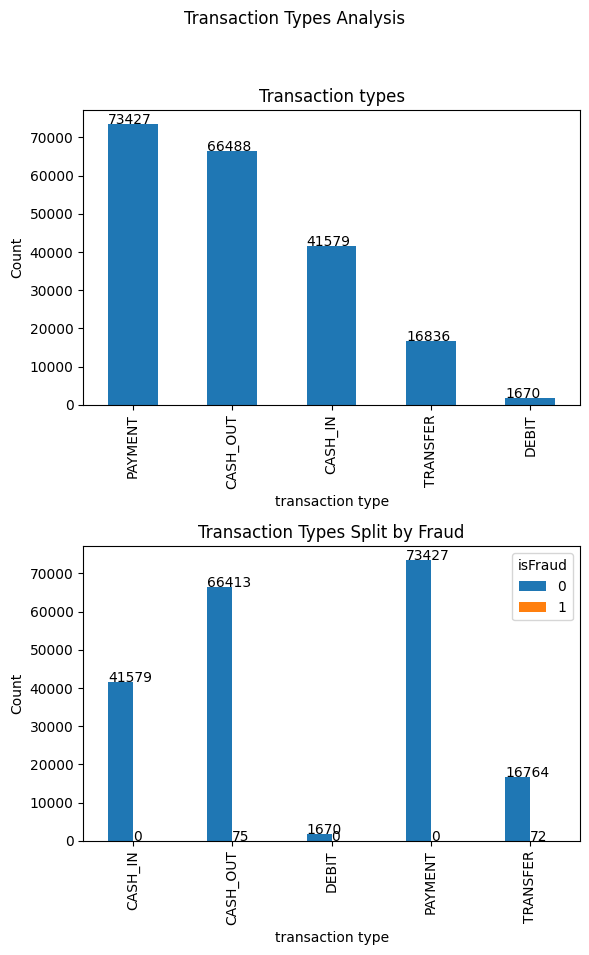

In [3]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        return df.groupby(['type', 'isFraud']).size().unstack(fill_value=0)

    fig, axs = plt.subplots(2, figsize=(6, 10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types')
    axs[0].set_xlabel('transaction type')
    axs[0].set_ylabel('Count')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Split by Fraud')
    axs[1].set_xlabel('transaction type')
    axs[1].set_ylabel('Count')
    fig.suptitle('Transaction Types Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The bar chart on the top represents the distribution of different transaction types. The bar chart at the ' \
           'bottom breaks down the transaction types further, showing how many of them were flagged as fraud (orange) ' \
           'and how many were not (blue). '

visual_1(df)

'This scatter plot illustrates the relationship between the balance delta of origin and destination accounts for Cash Out transactions. Each point represents a transaction, showing the change in balance from the origin account to the destination account.'

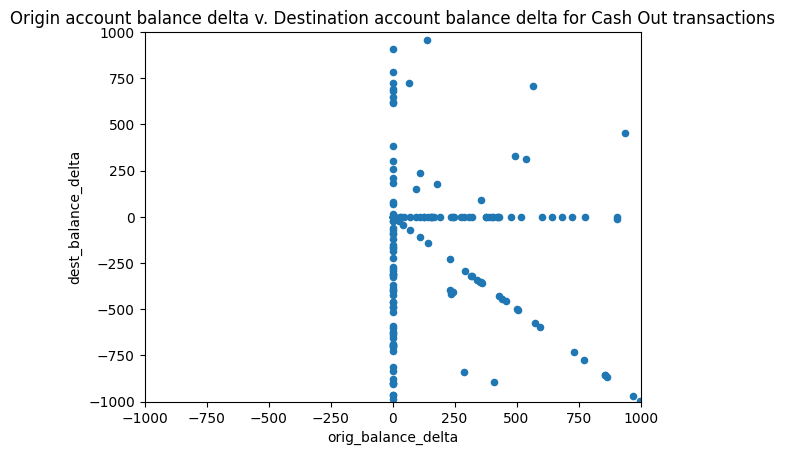

In [4]:
def visual_2(df):
    def query(df):
        cashOut = df[df['type'] == 'CASH_OUT'].copy()
        cashOut.loc[:, 'orig_balance_delta'] = cashOut['oldbalanceOrg'] - cashOut['newbalanceOrig']
        cashOut.loc[:, 'dest_balance_delta'] = cashOut['oldbalanceDest'] - cashOut['newbalanceDest']
        return cashOut

    plot = query(df).plot.scatter(x='orig_balance_delta', y='dest_balance_delta')
    plot.set_title('Origin account balance delta v. Destination account balance delta for Cash Out transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)

    return 'This scatter plot illustrates the relationship between the balance delta of origin and destination ' \
           'accounts for Cash Out transactions. Each point represents a transaction, showing the change in balance ' \
           'from the origin account to the destination account.'

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

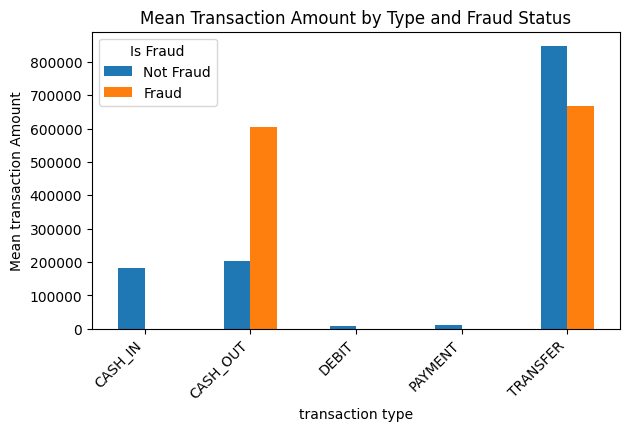

In [5]:
def exercise_custom(df):
    data = df.groupby(['type', 'isFraud'])['amount'].mean().unstack(level='isFraud')
    return data


def visual_custom(df):
    fig = exercise_custom(df).plot( kind='bar')
    fig.set_title('Mean Transaction Amount by Type and Fraud Status')
    fig.set_xlabel('transaction type')
    fig.set_ylabel('Mean transaction Amount')
    fig.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return plt.show()
    
visual_custom(df)

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.